In [47]:
%matplotlib inline

In [48]:
df = pd.read_csv("data_final2.csv")
df = df.iloc[:,1:]

In [58]:
del df["lot"]

## 종속변수 가격에 로그를 취해주면 정규분포에 가까워짐

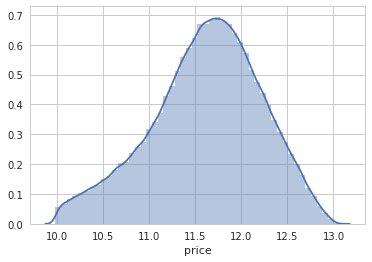

In [49]:
sns.distplot(np.log(df["price"]))

## cfsf 정규분포 형태로 만들기 위해 로그 변환

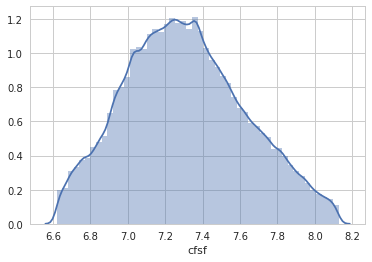

In [50]:
sns.distplot(np.log(df["cfsf"]))

## qualitytype을 카테고리로 묶음

In [51]:
df["qualitytype"][df["qualitytype"] <=3] = "A"
df["qualitytype"][df["qualitytype"] <=6] = "B"
df["qualitytype"][df["qualitytype"] <=8] = "C"
df["qualitytype"][df["qualitytype"] <=10] = "D"
df["qualitytype"][df["qualitytype"] <=13] = "E"

In [52]:
df.head()

,bath,bed,qualitytype,cfsf,lot,aircondition,heating,spa,pool,landuse,year,city,price
0,2.0,2.0,B,1090.0,40247.0,1.0,2.0,0.0,0.0,266.0,2004.0,12447.0,229399.0
1,2.0,3.0,B,2077.0,6490.0,0.0,2.0,0.0,0.0,261.0,1926.0,26964.0,207035.0
2,3.0,3.0,B,2166.0,22073.0,1.0,2.0,0.0,0.0,266.0,2005.0,54722.0,363000.0
3,1.0,3.0,C,1244.0,6021.0,0.0,7.0,0.0,0.0,261.0,1950.0,13716.0,106418.0
4,2.0,3.0,C,1300.0,4917.0,1.0,2.0,0.0,0.0,261.0,1950.0,53636.0,76253.0


## 도시별 평당 가격으로 20개의 그룹으로 묶음

In [53]:
df["price_cfsf"] = df["price"]/df["cfsf"]
df.head()

,bath,bed,qualitytype,cfsf,lot,aircondition,heating,spa,pool,landuse,year,city,price,price_cfsf
0,2.0,2.0,B,1090.0,40247.0,1.0,2.0,0.0,0.0,266.0,2004.0,12447.0,229399.0,210.457798
1,2.0,3.0,B,2077.0,6490.0,0.0,2.0,0.0,0.0,261.0,1926.0,26964.0,207035.0,99.679827
2,3.0,3.0,B,2166.0,22073.0,1.0,2.0,0.0,0.0,266.0,2005.0,54722.0,363000.0,167.590028
3,1.0,3.0,C,1244.0,6021.0,0.0,7.0,0.0,0.0,261.0,1950.0,13716.0,106418.0,85.545016
4,2.0,3.0,C,1300.0,4917.0,1.0,2.0,0.0,0.0,261.0,1950.0,53636.0,76253.0,58.656154


In [74]:
aa = pd.DataFrame(df.groupby(["city"])["price_cfsf"].mean())
aa = aa.reset_index()

In [149]:
# aa는 도시별로 그룹해서 평균 가격을 qcut으로 한거 
# cats = pd.qcut(aa["price_cfsf"], 20, labels=["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"])

In [76]:
aa = pd.concat([aa, cats], axis=1)

,city,price_cfsf,price_cfsf
0,3491.0,116.026132,20
1,4406.0,79.847758,10
2,5465.0,82.858624,11
3,5534.0,69.709098,4
4,6021.0,81.283484,10


In [77]:
aa.columns = ["city", "price_cfs", "cat_price"]
temp = pd.merge(df, aa, on = "city")

In [88]:
temp.head()

,bath,bed,qualitytype,cfsf,aircondition,heating,spa,pool,landuse,year,city,price,price_cfsf,cat_price
0,2.0,2.0,B,1090.0,1.0,2.0,0.0,0.0,266.0,2004.0,12447.0,229399.0,210.457798,12
1,2.0,3.0,B,1766.0,0.0,2.0,0.0,1.0,261.0,1962.0,12447.0,118400.0,67.044168,12
2,3.0,5.0,A,3085.0,1.0,2.0,0.0,0.0,261.0,1995.0,12447.0,407992.0,132.250243,12
3,3.0,5.0,B,2401.0,1.0,2.0,0.0,1.0,261.0,1965.0,12447.0,159612.0,66.477301,12
4,3.0,4.0,B,2397.0,1.0,2.0,0.0,1.0,261.0,1984.0,12447.0,270282.0,112.758448,12


In [89]:
del temp["price_cfsf"]

In [97]:
del temp["city"]

## 종속변수 독립변수 상관관계 알아보기

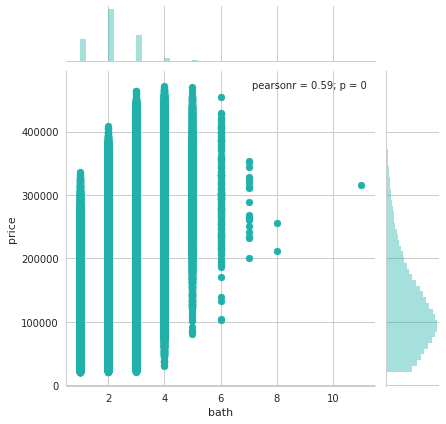

In [135]:
plt.figure(figsize=(10,10), dpi=200)
sns.jointplot("bath", "price", data=temp, color="lightseagreen")
plt.show()

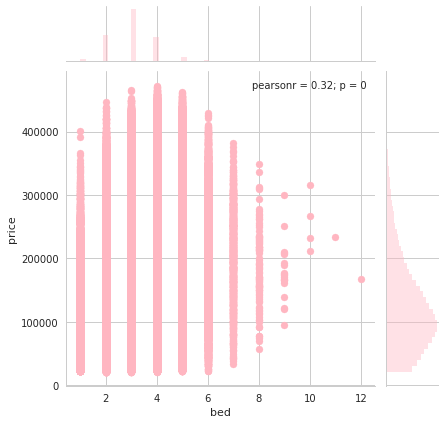

In [136]:
plt.figure(figsize=(10,10), dpi=200)
sns.jointplot("bed", "price", data=temp, color="lightpink")
plt.show()

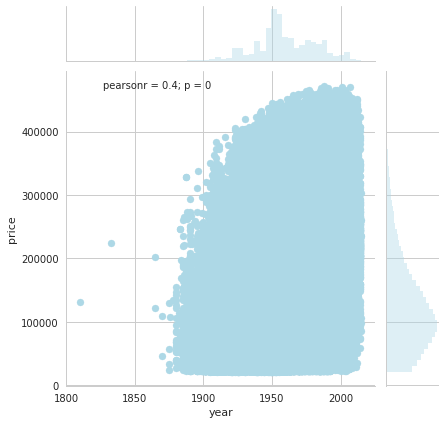

In [138]:
plt.figure(figsize=(10,10), dpi=200)
sns.jointplot("year", "price", data=temp, color="lightblue")
plt.show()

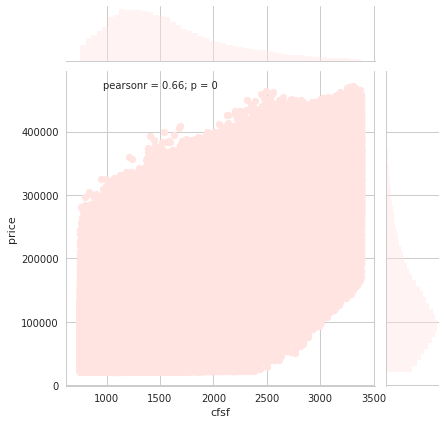

In [137]:
plt.figure(figsize=(10,10), dpi=200)
sns.jointplot("cfsf", "price", data=temp, color="mistyrose")
plt.show()

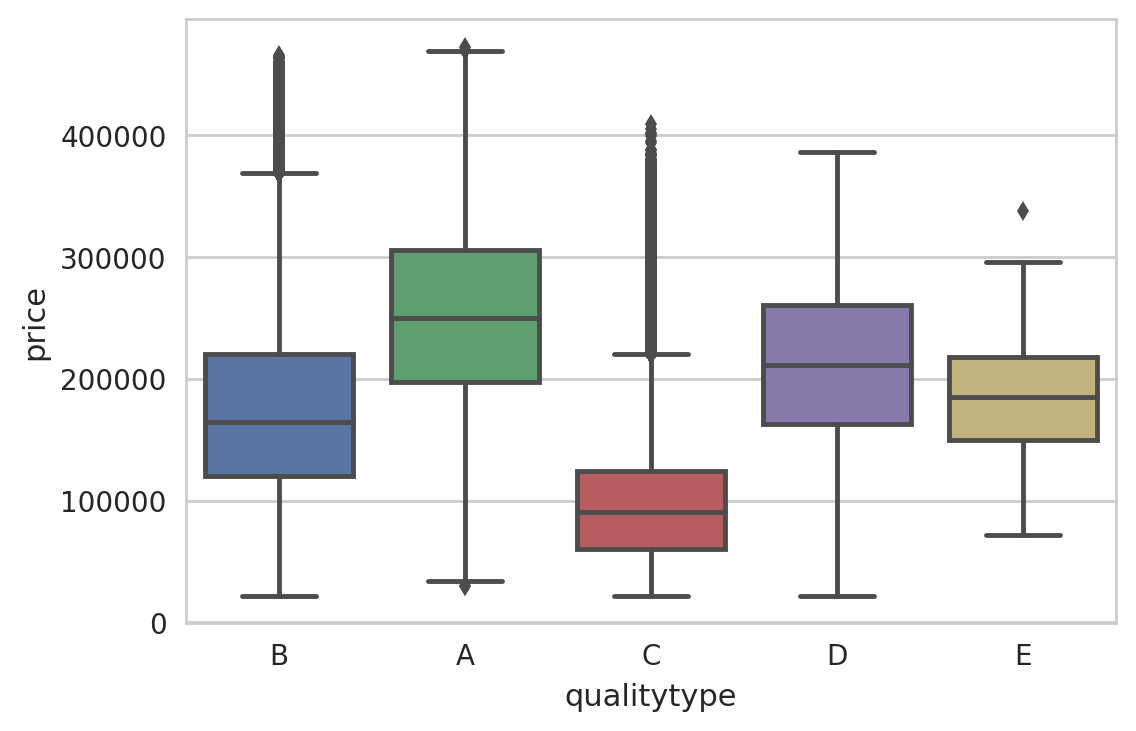

In [139]:
plt.figure(dpi=200)
sns.boxplot("qualitytype", "price", data=temp)
plt.show()

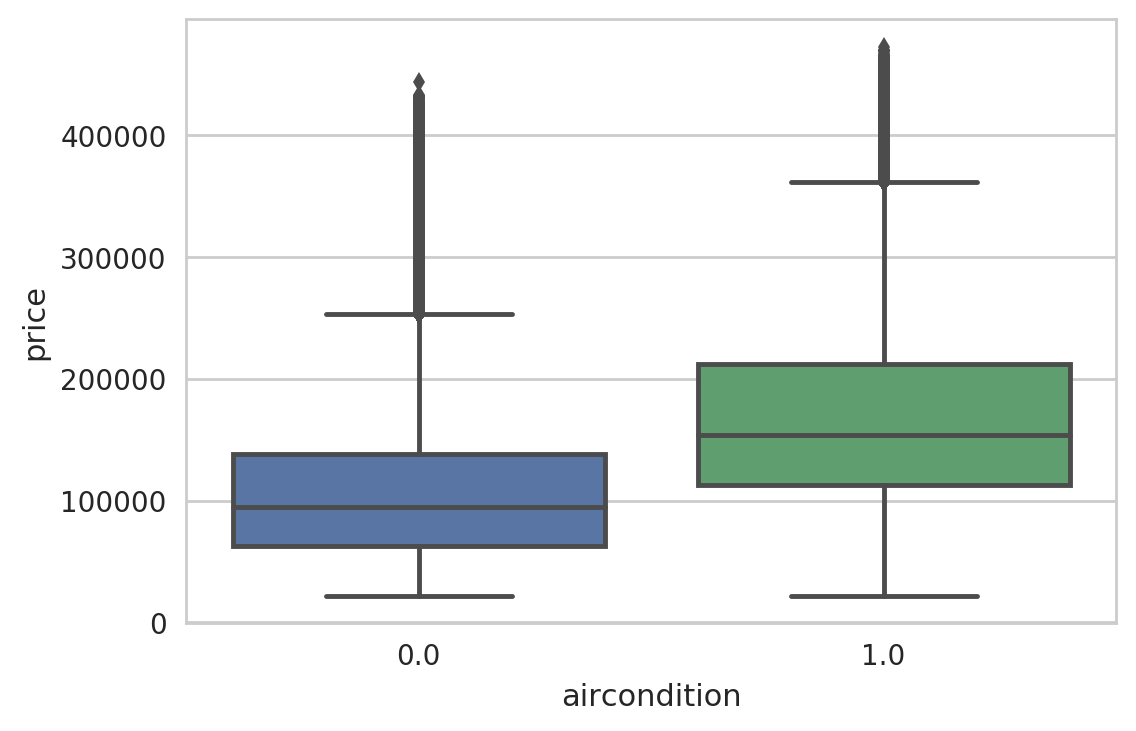

In [140]:
plt.figure(dpi=200)
sns.boxplot("aircondition", "price", data=temp)
plt.show()

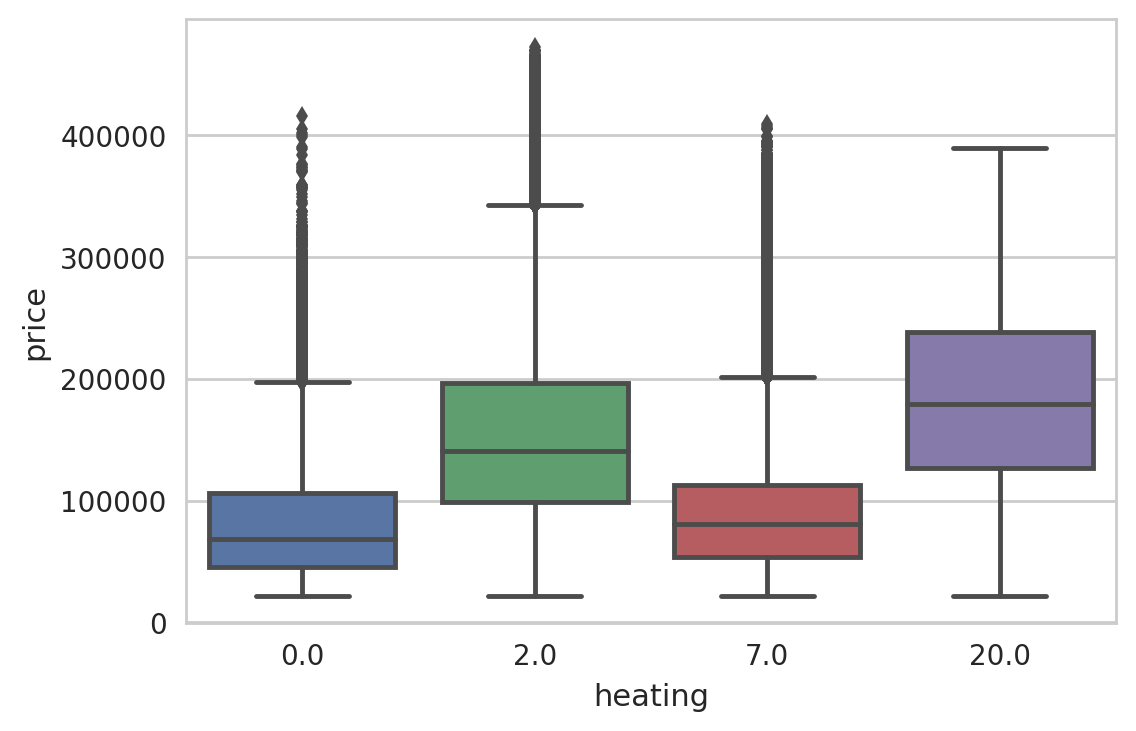

In [141]:
plt.figure(dpi=200)
sns.boxplot("heating", "price", data=temp)
plt.show()

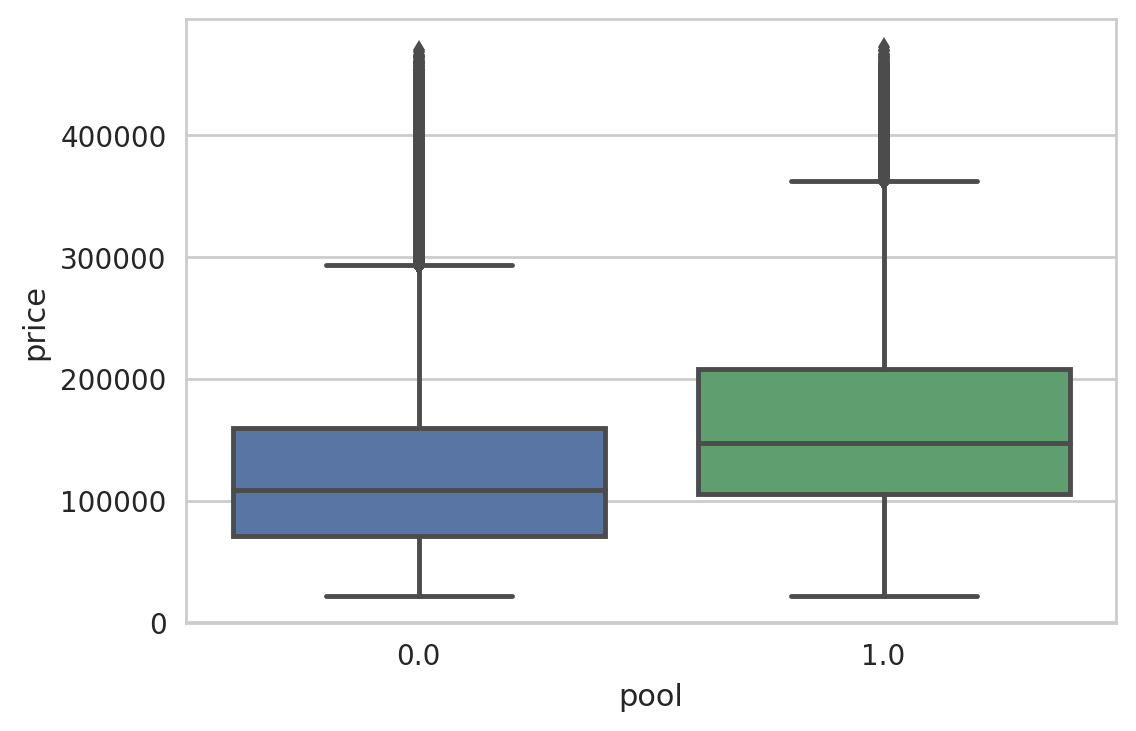

In [143]:
plt.figure(dpi=200)
sns.boxplot("pool", "price", data=temp)
plt.show()

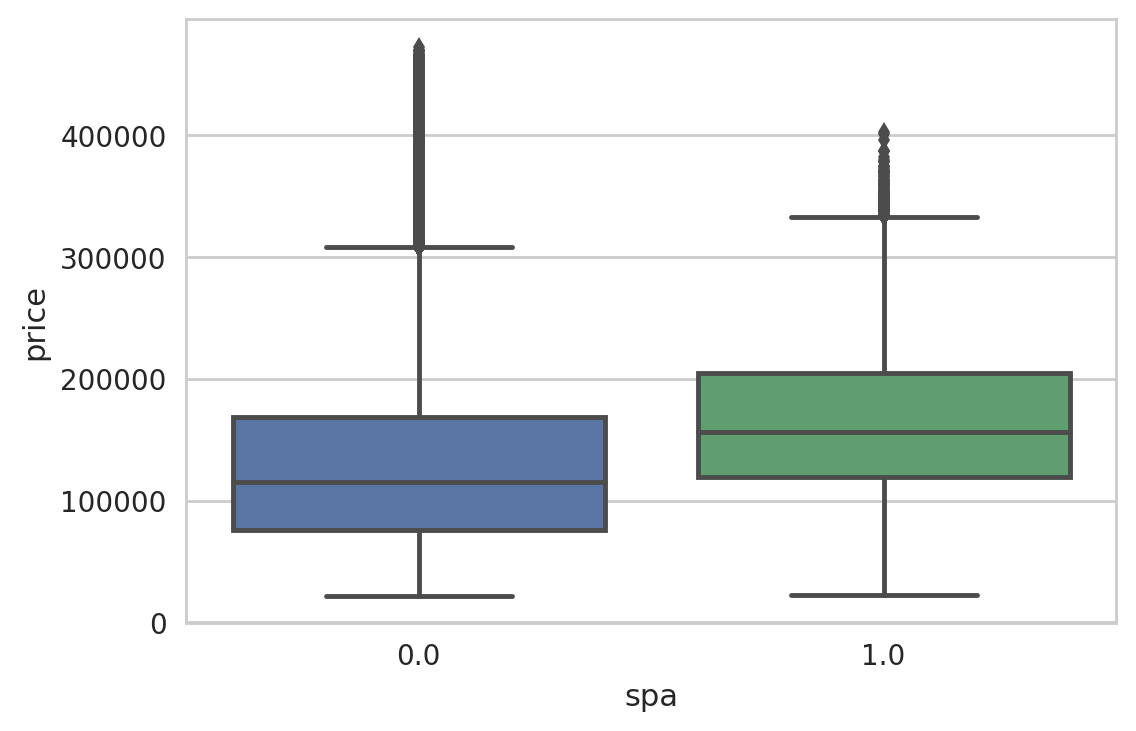

In [144]:
plt.figure(dpi=200)
sns.boxplot("spa", "price", data=temp)
plt.show()

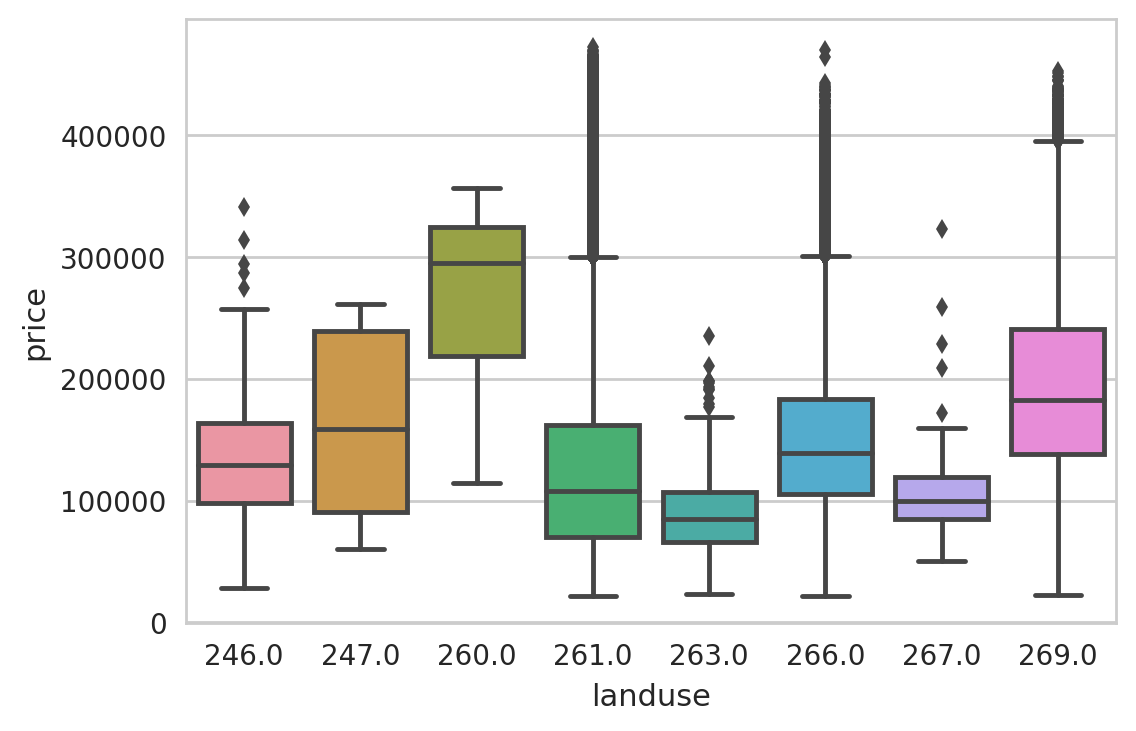

In [145]:
plt.figure(dpi=200)
sns.boxplot("landuse", "price", data=temp)
plt.show()

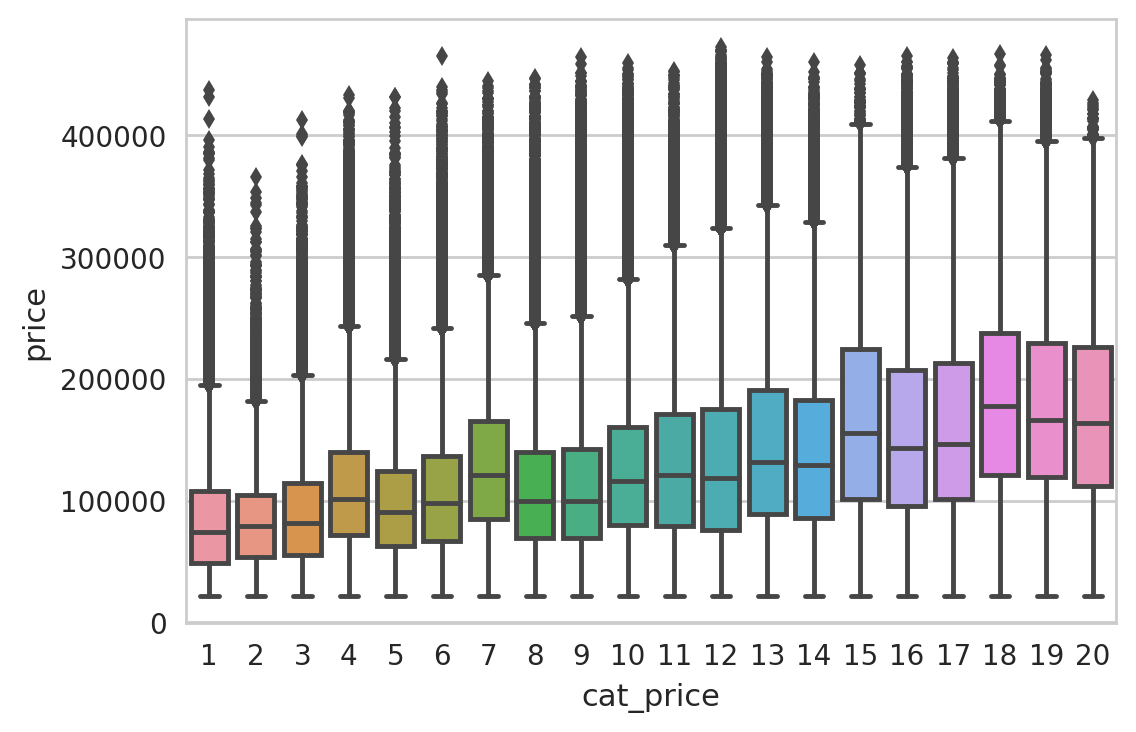

In [146]:
plt.figure(dpi=200)
sns.boxplot("cat_price", "price", data=temp)
plt.show()

In [125]:
temp["qualitytype"] = temp["qualitytype"].astype(str)
temp["landuse"] = temp["landuse"].astype(str)

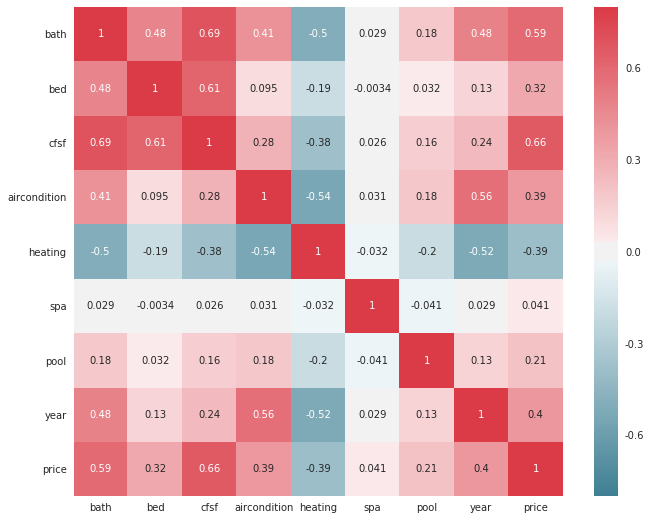

In [126]:
# string은 빠진다 
def corrmatrix(df):
    corrmat = df.corr()
    plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrmat, vmax=.8, square=True, cmap=cmap, annot=True)
    
corrmatrix(temp)

In [128]:
df_dtype = temp.dtypes.reset_index()
df_dtype.columns = ["name", "type"]
df_dtype

,name,type
0,bath,float64
1,bed,float64
2,qualitytype,object
3,cfsf,float64
4,aircondition,float64
5,heating,float64
6,spa,float64
7,pool,float64
8,landuse,object
9,year,float64


In [148]:
temp2 = temp.iloc[:, [0,1,2,3,4,5,6,7,8,9,11,10]]
temp2.head()

,bath,bed,qualitytype,cfsf,aircondition,heating,spa,pool,landuse,year,cat_price,price
0,2.0,2.0,B,1090.0,1.0,2.0,0.0,0.0,266.0,2004.0,12,229399.0
1,2.0,3.0,B,1766.0,0.0,2.0,0.0,1.0,261.0,1962.0,12,118400.0
2,3.0,5.0,A,3085.0,1.0,2.0,0.0,0.0,261.0,1995.0,12,407992.0
3,3.0,5.0,B,2401.0,1.0,2.0,0.0,1.0,261.0,1965.0,12,159612.0
4,3.0,4.0,B,2397.0,1.0,2.0,0.0,1.0,261.0,1984.0,12,270282.0


## boxplot 기준으로 이상치를 날려보겠슴니다 

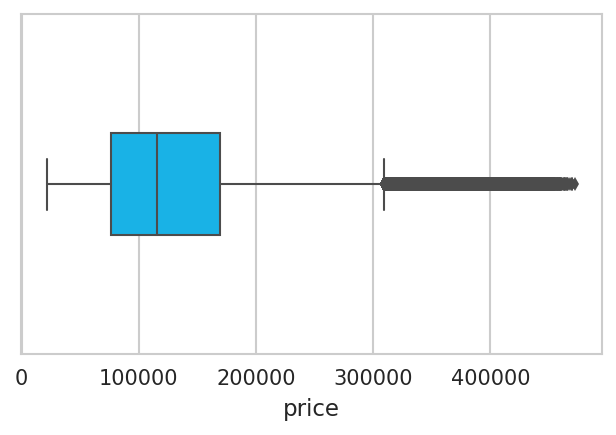

In [195]:
plt.figure(figsize=(5, 3), dpi=150)
sns.boxplot(temp2["price"], color="deepskyblue", linewidth=1, width=0.3, saturation=0.8)
plt.show()

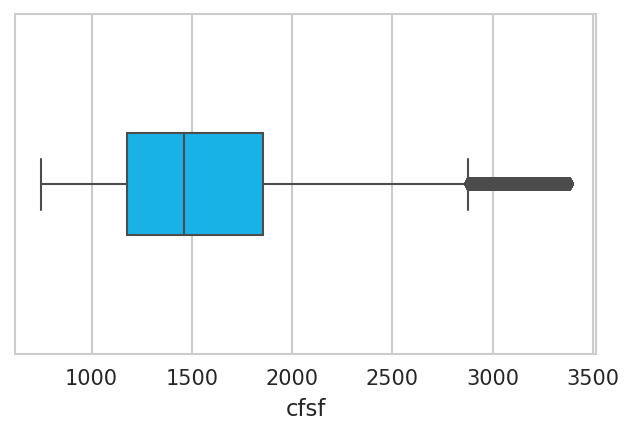

In [205]:
plt.figure(figsize=(5, 3), dpi=150)
sns.boxplot(temp2["cfsf"], color="deepskyblue", linewidth=1, width=0.3, saturation=0.8)
plt.show()

In [172]:
def boxout(data, feature):
    q1 = np.percentile(data[feature], 25)
    q3 = np.percentile(data[feature], 75)
    iqr = q3-q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    
    data = data[(data[feature] > low) & (data[feature] < up)]
    return data

In [209]:
temp3 = boxout(temp3, "price")
temp3 = boxout(temp3, "cfsf")

In [219]:
temp3.head()

,bath,bed,qualitytype,cfsf,aircondition,heating,spa,pool,landuse,year,cat_price,price
0,2.0,2.0,B,1090.0,1.0,2.0,0.0,0.0,266.0,2004.0,12,229399.0
1,2.0,3.0,B,1766.0,0.0,2.0,0.0,1.0,261.0,1962.0,12,118400.0
3,3.0,5.0,B,2401.0,1.0,2.0,0.0,1.0,261.0,1965.0,12,159612.0
4,3.0,4.0,B,2397.0,1.0,2.0,0.0,1.0,261.0,1984.0,12,270282.0
5,3.0,4.0,B,2574.0,1.0,2.0,0.0,1.0,261.0,1981.0,12,236017.0


## 그냥 회귀분석

In [224]:
model = sm.OLS.from_formula("price ~ bath + bed + C(qualitytype) + cfsf + C(aircondition) + C(heating) + C(spa) \
                            + C(pool) + year + C(cat_price)", data=temp3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 3.358e+04
Date:                Sat, 08 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:29:00   Log-Likelihood:            -1.6610e+07
No. Observations:             1371009   AIC:                         3.322e+07
Df Residuals:                 1370975   BIC:                         3.322e+07
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.79

In [225]:
def predict(model, data):
    pred = model.fittedvalues
    prediction = pd.DataFrame((pred))
    prediction["price"] = data["price"]
    prediction.columns = ["predict", "price"]
    return prediction

In [226]:
pre = predict(model, temp3)
pre.head(30)

,predict,price
0,134451.949951,229399.0
1,145978.845920,118400.0
3,195537.571442,159612.0
4,205835.587244,270282.0
5,213790.492137,236017.0
6,189839.682054,205440.0
7,219011.026346,254366.0
8,131748.785228,130324.0
9,107586.288860,102315.0
10,107586.288860,176998.0


## lasso 정규화 회귀

In [227]:
temp3.head()

,bath,bed,qualitytype,cfsf,aircondition,heating,spa,pool,landuse,year,cat_price,price
0,2.0,2.0,B,1090.0,1.0,2.0,0.0,0.0,266.0,2004.0,12,229399.0
1,2.0,3.0,B,1766.0,0.0,2.0,0.0,1.0,261.0,1962.0,12,118400.0
3,3.0,5.0,B,2401.0,1.0,2.0,0.0,1.0,261.0,1965.0,12,159612.0
4,3.0,4.0,B,2397.0,1.0,2.0,0.0,1.0,261.0,1984.0,12,270282.0
5,3.0,4.0,B,2574.0,1.0,2.0,0.0,1.0,261.0,1981.0,12,236017.0


In [231]:
landuse_dummy = pd.get_dummies(temp3["landuse"])
city_dummy = pd.get_dummies(temp3["cat_price"])
quality_dummy = pd.get_dummies(temp3["qualitytype"])
heating_dummy = pd.get_dummies(temp3["heating"])

dfy2 = np.log(temp3["price"])
dfX = pd.concat([temp3.iloc[:,[0,1,3,4,6,7,9]], landuse_dummy, city_dummy, quality_dummy, heating_dummy], axis=1)


In [232]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.001)
clf.fit(dfX, dfy2)
ee = pd.concat([pd.DataFrame([np.exp(clf.predict(dfX)), temp3["price"]])], axis=1) 

In [234]:
ee.T.head(30)

,0,1
0,126524.692496,229399.0
1,129053.264087,118400.0
2,202237.869689,159612.0
3,216574.304919,270282.0
4,232363.299359,236017.0
5,189454.455925,205440.0
6,243048.147802,254366.0
7,118931.831769,130324.0
8,95203.995675,102315.0
9,95203.995675,176998.0


# pca로 다중공선성 제거 후 회귀분석

In [251]:
temp3.head(3)

,bath,bed,qualitytype,cfsf,aircondition,heating,spa,pool,landuse,year,cat_price,price
0,2.0,2.0,B,1090.0,1.0,2.0,0.0,0.0,266.0,2004.0,12,229399.0
1,2.0,3.0,B,1766.0,0.0,2.0,0.0,1.0,261.0,1962.0,12,118400.0
3,3.0,5.0,B,2401.0,1.0,2.0,0.0,1.0,261.0,1965.0,12,159612.0


In [252]:
#독립변수들 표준화 
from sklearn.preprocessing import StandardScaler
def std(data):
    numeric_columns = ["bath", "bed", "cfsf", "year"]
    stdData = StandardScaler().fit_transform(data[numeric_columns])
    stdData = pd.DataFrame(stdData, columns=numeric_columns)
    return stdData

In [302]:
from sklearn.decomposition import PCA as sklearnPCA
def pca(data, n):
    col = [ "PC" + str(x+1) for x in range(n)]
    tempPCA = sklearnPCA(n_components=n)
    newIndex = tempPCA.fit_transform(data)
    newData = pd.DataFrame(newIndex)
    newData.columns = col
    return newData, tempPCA

In [303]:
stdData = std(temp3)
stdData.head(3)

,bath,bed,cfsf,year
0,-0.007759,-1.205914,-0.917269,2.181538
1,-0.007759,0.039382,0.639194,0.163331
2,1.422929,2.529975,2.101257,0.307489


In [304]:
pcaData, PCA = pca(stdData, 3)

In [305]:
pcaData.head(3)

,PC1,PC2,PC3
0,-0.358796,-2.588967,0.386558
1,0.431078,0.069068,-0.180114
2,3.329710,1.281823,0.445466


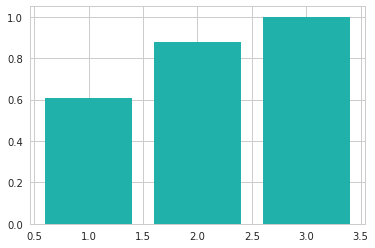

In [306]:
def pcagraph(pca):
    var = pca.explained_variance_
    plt.bar(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), color="lightseagreen")
    plt.show()

pcagraph(PCA)

In [307]:
a = np.arange(len(temp3))
temp3 = temp3.set_index(a)
temp3.head()

,bath,bed,qualitytype,cfsf,aircondition,heating,spa,pool,landuse,year,cat_price,price
0,2.0,2.0,B,1090.0,1.0,2.0,0.0,0.0,266.0,2004.0,12,229399.0
1,2.0,3.0,B,1766.0,0.0,2.0,0.0,1.0,261.0,1962.0,12,118400.0
2,3.0,5.0,B,2401.0,1.0,2.0,0.0,1.0,261.0,1965.0,12,159612.0
3,3.0,4.0,B,2397.0,1.0,2.0,0.0,1.0,261.0,1984.0,12,270282.0
4,3.0,4.0,B,2574.0,1.0,2.0,0.0,1.0,261.0,1981.0,12,236017.0


In [308]:
tp = temp3[["qualitytype", "aircondition", "spa", "pool", "landuse", "cat_price", "price"]]

In [309]:
pcaData2 = pd.concat([pcaData, tp], axis=1)
pcaData2.head(3)

,PC1,PC2,PC3,qualitytype,aircondition,spa,pool,landuse,cat_price,price
0,-0.358796,-2.588967,0.386558,B,1.0,0.0,0.0,266.0,12,229399.0
1,0.431078,0.069068,-0.180114,B,0.0,0.0,1.0,261.0,12,118400.0
2,3.329710,1.281823,0.445466,B,1.0,0.0,1.0,261.0,12,159612.0


In [341]:
model = sm.OLS.from_formula("price ~ PC1 + PC2 + PC3 + C(pool)", data=pcaData2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 2.134e+05
Date:                Sat, 08 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:18:02   Log-Likelihood:            -1.6684e+07
No. Observations:             1371009   AIC:                         3.337e+07
Df Residuals:                 1371004   BIC:                         3.337e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.165e+05     43.941   2651.

In [342]:
prePca = predict(model, pcaData2)

In [348]:
prePca.head(20)

,predict,price
0,125323.403337,229399.0
1,140517.088416,118400.0
2,183431.079217,159612.0
3,197111.509965,270282.0
4,202693.557559,236017.0
5,182865.054018,205440.0
6,206835.983624,254366.0
7,153345.108579,130324.0
8,122450.896581,102315.0
9,122450.896581,176998.0
